In [1]:
# import relevant modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn
import tensorflow
import pyswarms as ps

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
np.set_printoptions(precision=4)
sns.set(style="dark")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

print("pandas : {0}".format(pd.__version__))
print("numpy : {0}".format(np.__version__))
print("matplotlib : {0}".format(matplotlib.__version__))
print("seaborn : {0}".format(sns.__version__))
print("sklearn : {0}".format(sklearn.__version__))
print("imblearn : {0}".format(imblearn.__version__))
print("tensorflow : {0}".format(tensorflow.__version__))

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


pandas : 0.23.0
numpy : 1.16.1
matplotlib : 3.0.2
seaborn : 0.8.1
sklearn : 0.20.3
imblearn : 0.4.3
tensorflow : 1.12.0


In [2]:
# lable the column names to the dataset
# Dataset field names
datacols = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

# Load NSL_KDD train dataset
dfkdd_train = pd.read_table("C:/IntrusionDetectionSystem/pyswarms-master/KDDTrain+_2.csv", sep=",", names=datacols) 
dfkdd_train = dfkdd_train.iloc[:,:-1] #removes an unwanted extra field

# Load NSL_KDD test dataset
dfkdd_test = pd.read_table("C:/IntrusionDetectionSystem/pyswarms-master/KDDTest+_2.csv", sep=",", names=datacols)
dfkdd_test = dfkdd_test.iloc[:,:-1] #removes an unwanted extra field



In [3]:
# View train data
dfkdd_train.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune
6,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.0,0.0,0.0,0.05,0.06,0.00,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
7,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune
8,0,tcp,remote_job,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,1.0,1.0,0.0,0.0,0.09,0.05,0.00,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
9,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,8,1.0,1.0,0.0,0.0,0.06,0.06,0.00,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [4]:
# train set dimension
print('Train set dimension: {} rows, {} columns'.format(dfkdd_train.shape[0], dfkdd_train.shape[1]))

Train set dimension: 125973 rows, 42 columns


In [5]:
# View test data
dfkdd_test.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan
5,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal
6,0,tcp,smtp,SF,1022,387,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,3,0.0,0.00,0.0,0.0,1.00,0.00,1.00,255,28,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal
7,0,tcp,telnet,SF,129,174,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd
8,0,tcp,http,SF,327,467,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,33,47,0.0,0.00,0.0,0.0,1.00,0.00,0.04,151,255,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal
9,0,tcp,ftp,SF,26,157,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,52,26,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd


In [6]:
# test set dimension
print('Test set dimension: {} rows, {} columns'.format(dfkdd_test.shape[0], dfkdd_test.shape[1]))

Test set dimension: 22544 rows, 42 columns


In [7]:
mapping = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
        'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
        'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
        'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
        'sqlattack': 'U2R','httptunnel': 'U2R',
        'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
        'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
        'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
        'normal': 'Normal'
        }

In [8]:
# Apply attack class mappings to the dataset
dfkdd_train['attack_class'] = dfkdd_train['attack'].apply(lambda v: mapping[v])
dfkdd_test['attack_class'] = dfkdd_test['attack'].apply(lambda v: mapping[v])

In [9]:
# Drop attack field from both train and test data
dfkdd_train.drop(['attack'], axis=1, inplace=True)
dfkdd_test.drop(['attack'], axis=1, inplace=True)

In [10]:
# View train data 
dfkdd_train.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,Normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Normal
5,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,DoS
6,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.0,0.0,0.0,0.05,0.06,0.00,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
7,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,DoS
8,0,tcp,remote_job,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,1.0,1.0,0.0,0.0,0.09,0.05,0.00,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
9,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,8,1.0,1.0,0.0,0.0,0.06,0.06,0.00,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,DoS


In [11]:
# View train data 
dfkdd_test.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,DoS
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,DoS
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,Normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,Probe
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,Probe
5,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,Normal
6,0,tcp,smtp,SF,1022,387,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,3,0.0,0.00,0.0,0.0,1.00,0.00,1.00,255,28,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,Normal
7,0,tcp,telnet,SF,129,174,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,R2L
8,0,tcp,http,SF,327,467,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,33,47,0.0,0.00,0.0,0.0,1.00,0.00,0.04,151,255,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,Normal
9,0,tcp,ftp,SF,26,157,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,52,26,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,R2L


In [12]:
# Descriptive statistics
dfkdd_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# 'num_outbound_cmds' field has all 0 values. Hence, it will be removed from both train and test dataset since it is a redundant field.
dfkdd_train.drop(['num_outbound_cmds'], axis=1, inplace=True)
dfkdd_test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [14]:
# Attack Class Distribution
attack_class_freq_train = dfkdd_train[['attack_class']].apply(lambda x: x.value_counts())
attack_class_freq_test = dfkdd_test[['attack_class']].apply(lambda x: x.value_counts())
attack_class_freq_train['percent_train'] = round((100 * attack_class_freq_train / attack_class_freq_train.sum()),2)
attack_class_freq_test['percent_test'] = round((100 * attack_class_freq_test / attack_class_freq_test.sum()),2)

attack_class_dist = pd.concat([attack_class_freq_train,attack_class_freq_test], axis=1) 
attack_class_dist

,attack_class,percent_train,attack_class,percent_test
DoS,45927,36.46,7458,33.08
Normal,67343,53.46,9711,43.08
Probe,11656,9.25,2421,10.74
R2L,995,0.79,2754,12.22
U2R,52,0.04,200,0.89


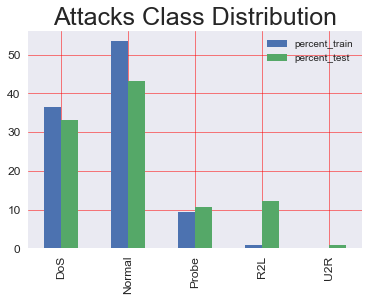

In [15]:
# Attack class bar plot
plot = attack_class_dist[['percent_train', 'percent_test']].plot(kind="bar");
plot.set_title("Attacks Class Distribution", fontsize=25);
plot.grid(color='red', alpha=0.5);

In [16]:
#view train data
dfkdd_train.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,Normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Normal
5,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,DoS
6,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.0,0.0,0.0,0.05,0.06,0.00,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
7,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,DoS
8,0,tcp,remote_job,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,1.0,1.0,0.0,0.0,0.09,0.05,0.00,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
9,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,8,1.0,1.0,0.0,0.0,0.06,0.06,0.00,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,DoS


In [17]:
#view test data
dfkdd_test.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,DoS
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,DoS
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,Normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,Probe
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,Probe
5,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,Normal
6,0,tcp,smtp,SF,1022,387,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,0.0,0.00,0.0,0.0,1.00,0.00,1.00,255,28,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,Normal
7,0,tcp,telnet,SF,129,174,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,R2L
8,0,tcp,http,SF,327,467,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,33,47,0.0,0.00,0.0,0.0,1.00,0.00,0.04,151,255,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,Normal
9,0,tcp,ftp,SF,26,157,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,52,26,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,R2L


In [18]:
#Scaling Numerical Attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = dfkdd_train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(dfkdd_train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(dfkdd_test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [19]:
#Encoding of Categorical Attributes
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
cattrain = dfkdd_train.select_dtypes(include=['object']).copy()
cattest = dfkdd_test.select_dtypes(include=['object']).copy()

# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

# separate target column from encoded data 
enctrain = traincat.drop(['attack_class'], axis=1)
enctest = testcat.drop(['attack_class'], axis=1)

cat_Ytrain = traincat[['attack_class']].copy()
cat_Ytest = testcat[['attack_class']].copy()

In [20]:
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter

# define columns and extract encoded train set for sampling 
sc_traindf = dfkdd_train.select_dtypes(include=['float64','int64'])
refclasscol = pd.concat([sc_traindf, enctrain], axis=1).columns
refclass = np.concatenate((sc_train, enctrain.values), axis=1)
X = refclass

# reshape target column to 1D array shape  
c, r = cat_Ytest.values.shape
y_test = cat_Ytest.values.reshape(c,)

c, r = cat_Ytrain.values.shape
y = cat_Ytrain.values.reshape(c,)

# apply the random over-sampling
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_sample(X, y)
print('Original dataset shape {}'.format(Counter(y)))


Original dataset shape Counter({1: 67343, 0: 45927, 2: 11656, 3: 995, 4: 52})


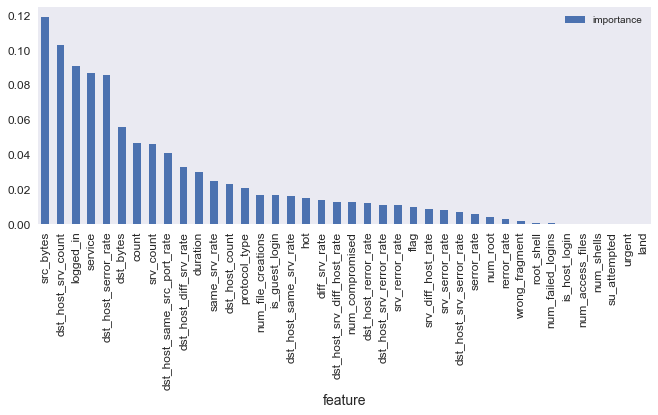

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(X_res, y_res);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':refclasscol,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [22]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_res, y_res)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), refclasscol)]
selected_features = [v for i, v in feature_map if i==True]

In [23]:
#features selected out of 41
selected_features

['src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'service']

In [24]:
# define columns to new dataframe
newcol = list(refclasscol)
newcol.append('attack_class')

# add a dimension to target
new_y_res = y_res[:, np.newaxis]

# create a dataframe from sampled data
res_arr = np.concatenate((X_res, new_y_res), axis=1)
res_df = pd.DataFrame(res_arr, columns = newcol) 

# create test dataframe
reftest = pd.concat([sc_testdf, testcat], axis=1)
reftest['attack_class'] = reftest['attack_class'].astype(np.float64)
reftest['protocol_type'] = reftest['protocol_type'].astype(np.float64)
reftest['flag'] = reftest['flag'].astype(np.float64)
reftest['service'] = reftest['service'].astype(np.float64)

res_df.shape
reftest.shape

(22544, 41)

In [25]:
# define columns to new dataframe
from collections import defaultdict
classdict = defaultdict(list)

# create two-target classes (normal class and an attack class)  
attacklist = [('DoS', 0.0), ('Probe', 2.0), ('R2L', 3.0), ('U2R', 4.0)]
normalclass = [('Normal', 1.0)]

def create_classdict():
    '''This function subdivides train and test dataset into two-class attack labels''' 
    for j, k in normalclass: 
        for i, v in attacklist: 
            restrain_set = res_df.loc[(res_df['attack_class'] == k) | (res_df['attack_class'] == v)]
            classdict[j +'_' + i].append(restrain_set)
            # test labels
            reftest_set = reftest.loc[(reftest['attack_class'] == k) | (reftest['attack_class'] == v)]
            classdict[j +'_' + i].append(reftest_set)
        
create_classdict()

In [26]:
for k, v in classdict.items():
    k

In [27]:
pretrain = classdict['Normal_DoS'][0]
pretest = classdict['Normal_DoS'][1]
grpclass = 'Normal_DoS'

In [28]:
#Finalize data preprocessing for training
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

Xresdf = pretrain 
newtest = pretest

Xresdfnew = Xresdf[selected_features]
Xresdfnum = Xresdfnew.drop(['service'], axis=1)
Xresdfcat = Xresdfnew[['service']].copy()

Xtest_features = newtest[selected_features]
Xtestdfnum = Xtest_features.drop(['service'], axis=1)
Xtestcat = Xtest_features[['service']].copy()


# Fit train data
enc.fit(Xresdfcat)

# Transform train data
X_train_1hotenc = enc.transform(Xresdfcat).toarray()
       
# Transform test data
X_test_1hotenc = enc.transform(Xtestcat).toarray()

X_train = np.concatenate((Xresdfnum.values, X_train_1hotenc), axis=1)
X_test = np.concatenate((Xtestdfnum.values, X_test_1hotenc), axis=1) 

y_train = Xresdf[['attack_class']].copy()
c, r = y_train.values.shape
Y_train = y_train.values.reshape(c,)

y_test = newtest[['attack_class']].copy()
c, r = y_test.values.shape
Y_test = y_test.values.reshape(c,)

In [29]:
y_test.head(10)

,attack_class
0,0.0
1,0.0
2,1.0
5,1.0
6,1.0
8,1.0
11,1.0
12,0.0
13,0.0
14,1.0


In [30]:
#test model
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 60, init = 'uniform', activation = 'relu', input_dim = 74))

#Adding a second hidden layer
classifier.add(Dense(output_dim = 60, init = 'uniform', activation = 'relu'))

#Adding a third hidden layer
classifier.add(Dense(output_dim = 60, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Test set
classifier.fit(X_test, Y_test, batch_size = 10, nb_epoch = 25)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.3)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

#the performance of the classification model
print("the Accuracy is: "+ str((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])))
recall = cm[1,1]/(cm[0,1]+cm[1,1])
print("Recall is : "+ str(recall))
print("False Positive rate: "+ str(cm[1,0]/(cm[0,0]+cm[1,0])))
precision = cm[1,1]/(cm[1,0]+cm[1,1])
print("Precision is: "+ str(precision))
print("F-measure is: "+ str(2*((precision*recall)/(precision+recall))))
from math import log
print("Entropy is: "+ str(-precision*log(precision)))

Using TensorFlow backend.


Epoch 1/25
17169/17169 [==============================] - ETA: 1:45:32 - loss: 0.6931 - acc: 0.80 - ETA: 5:17 - loss: 0.6904 - acc: 0.6850   - ETA: 2:57 - loss: 0.6808 - acc: 0.733 - ETA: 1:58 - loss: 0.6389 - acc: 0.766 - ETA: 1:27 - loss: 0.5798 - acc: 0.775 - ETA: 1:12 - loss: 0.5514 - acc: 0.787 - ETA: 58s - loss: 0.5101 - acc: 0.801 - ETA: 48s - loss: 0.4658 - acc: 0.82 - ETA: 41s - loss: 0.4439 - acc: 0.82 - ETA: 37s - loss: 0.4330 - acc: 0.83 - ETA: 34s - loss: 0.4254 - acc: 0.83 - ETA: 29s - loss: 0.4070 - acc: 0.84 - ETA: 26s - loss: 0.3907 - acc: 0.85 - ETA: 24s - loss: 0.3821 - acc: 0.85 - ETA: 22s - loss: 0.3710 - acc: 0.85 - ETA: 20s - loss: 0.3573 - acc: 0.86 - ETA: 19s - loss: 0.3470 - acc: 0.86 - ETA: 17s - loss: 0.3403 - acc: 0.87 - ETA: 16s - loss: 0.3325 - acc: 0.87 - ETA: 16s - loss: 0.3296 - acc: 0.87 - ETA: 15s - loss: 0.3220 - acc: 0.87 - ETA: 15s - loss: 0.3194 - acc: 0.87 - ETA: 14s - loss: 0.3135 - acc: 0.88 - ETA: 14s - loss: 0.3078 - acc: 0.88 - ETA: 13s - l

17169/17169 [==============================] - ETA: 10s - loss: 0.0011 - acc: 1.00 - ETA: 5s - loss: 0.0363 - acc: 0.9895 - ETA: 4s - loss: 0.0392 - acc: 0.989 - ETA: 5s - loss: 0.0378 - acc: 0.988 - ETA: 4s - loss: 0.0331 - acc: 0.990 - ETA: 4s - loss: 0.0386 - acc: 0.986 - ETA: 4s - loss: 0.0495 - acc: 0.982 - ETA: 4s - loss: 0.0520 - acc: 0.979 - ETA: 4s - loss: 0.0493 - acc: 0.981 - ETA: 4s - loss: 0.0472 - acc: 0.981 - ETA: 4s - loss: 0.0481 - acc: 0.981 - ETA: 4s - loss: 0.0463 - acc: 0.982 - ETA: 3s - loss: 0.0445 - acc: 0.983 - ETA: 3s - loss: 0.0443 - acc: 0.983 - ETA: 3s - loss: 0.0422 - acc: 0.984 - ETA: 3s - loss: 0.0401 - acc: 0.985 - ETA: 3s - loss: 0.0391 - acc: 0.986 - ETA: 3s - loss: 0.0384 - acc: 0.986 - ETA: 3s - loss: 0.0389 - acc: 0.986 - ETA: 3s - loss: 0.0387 - acc: 0.986 - ETA: 3s - loss: 0.0373 - acc: 0.986 - ETA: 3s - loss: 0.0362 - acc: 0.986 - ETA: 3s - loss: 0.0367 - acc: 0.986 - ETA: 3s - loss: 0.0381 - acc: 0.986 - ETA: 3s - loss: 0.0368 - acc: 0.987 - ET

17169/17169 [==============================] - ETA: 26s - loss: 0.0130 - acc: 1.00 - ETA: 3s - loss: 0.0290 - acc: 0.9881 - ETA: 2s - loss: 0.0207 - acc: 0.992 - ETA: 2s - loss: 0.0204 - acc: 0.993 - ETA: 2s - loss: 0.0221 - acc: 0.992 - ETA: 2s - loss: 0.0218 - acc: 0.992 - ETA: 2s - loss: 0.0228 - acc: 0.991 - ETA: 2s - loss: 0.0217 - acc: 0.991 - ETA: 2s - loss: 0.0223 - acc: 0.991 - ETA: 2s - loss: 0.0224 - acc: 0.991 - ETA: 2s - loss: 0.0209 - acc: 0.992 - ETA: 2s - loss: 0.0220 - acc: 0.991 - ETA: 2s - loss: 0.0237 - acc: 0.991 - ETA: 2s - loss: 0.0234 - acc: 0.991 - ETA: 1s - loss: 0.0240 - acc: 0.990 - ETA: 1s - loss: 0.0246 - acc: 0.990 - ETA: 1s - loss: 0.0242 - acc: 0.990 - ETA: 1s - loss: 0.0246 - acc: 0.990 - ETA: 1s - loss: 0.0240 - acc: 0.991 - ETA: 1s - loss: 0.0235 - acc: 0.991 - ETA: 1s - loss: 0.0231 - acc: 0.991 - ETA: 1s - loss: 0.0229 - acc: 0.991 - ETA: 1s - loss: 0.0226 - acc: 0.991 - ETA: 1s - loss: 0.0221 - acc: 0.991 - ETA: 1s - loss: 0.0215 - acc: 0.991 - ET

17169/17169 [==============================] - ETA: 0s - loss: 2.3607e-04 - acc: 1.000 - ETA: 4s - loss: 0.0161 - acc: 0.9923    - ETA: 3s - loss: 0.0091 - acc: 0.995 - ETA: 2s - loss: 0.0081 - acc: 0.995 - ETA: 2s - loss: 0.0139 - acc: 0.993 - ETA: 2s - loss: 0.0198 - acc: 0.992 - ETA: 2s - loss: 0.0279 - acc: 0.991 - ETA: 2s - loss: 0.0270 - acc: 0.991 - ETA: 1s - loss: 0.0282 - acc: 0.991 - ETA: 1s - loss: 0.0259 - acc: 0.992 - ETA: 1s - loss: 0.0249 - acc: 0.992 - ETA: 1s - loss: 0.0230 - acc: 0.993 - ETA: 1s - loss: 0.0229 - acc: 0.992 - ETA: 1s - loss: 0.0222 - acc: 0.993 - ETA: 1s - loss: 0.0218 - acc: 0.993 - ETA: 1s - loss: 0.0216 - acc: 0.993 - ETA: 1s - loss: 0.0213 - acc: 0.993 - ETA: 1s - loss: 0.0211 - acc: 0.993 - ETA: 1s - loss: 0.0208 - acc: 0.993 - ETA: 1s - loss: 0.0213 - acc: 0.992 - ETA: 1s - loss: 0.0212 - acc: 0.993 - ETA: 1s - loss: 0.0211 - acc: 0.993 - ETA: 1s - loss: 0.0211 - acc: 0.992 - ETA: 1s - loss: 0.0210 - acc: 0.992 - ETA: 1s - loss: 0.0206 - acc: 0.9

17169/17169 [==============================] - ETA: 26s - loss: 5.4262e-05 - acc: 1.00 - ETA: 3s - loss: 0.0022 - acc: 1.0000     - ETA: 3s - loss: 0.0216 - acc: 0.993 - ETA: 2s - loss: 0.0175 - acc: 0.994 - ETA: 2s - loss: 0.0148 - acc: 0.995 - ETA: 2s - loss: 0.0155 - acc: 0.994 - ETA: 2s - loss: 0.0145 - acc: 0.994 - ETA: 2s - loss: 0.0135 - acc: 0.994 - ETA: 2s - loss: 0.0143 - acc: 0.994 - ETA: 2s - loss: 0.0145 - acc: 0.994 - ETA: 2s - loss: 0.0158 - acc: 0.994 - ETA: 2s - loss: 0.0167 - acc: 0.994 - ETA: 2s - loss: 0.0161 - acc: 0.994 - ETA: 2s - loss: 0.0151 - acc: 0.994 - ETA: 2s - loss: 0.0150 - acc: 0.995 - ETA: 2s - loss: 0.0152 - acc: 0.994 - ETA: 1s - loss: 0.0164 - acc: 0.994 - ETA: 1s - loss: 0.0164 - acc: 0.994 - ETA: 1s - loss: 0.0167 - acc: 0.994 - ETA: 1s - loss: 0.0175 - acc: 0.994 - ETA: 1s - loss: 0.0175 - acc: 0.994 - ETA: 1s - loss: 0.0175 - acc: 0.994 - ETA: 1s - loss: 0.0178 - acc: 0.993 - ETA: 1s - loss: 0.0183 - acc: 0.993 - ETA: 1s - loss: 0.0184 - acc: 0.

17169/17169 [==============================] - ETA: 8s - loss: 0.0015 - acc: 1.000 - ETA: 4s - loss: 0.0229 - acc: 0.995 - ETA: 4s - loss: 0.0267 - acc: 0.988 - ETA: 4s - loss: 0.0240 - acc: 0.990 - ETA: 4s - loss: 0.0205 - acc: 0.992 - ETA: 4s - loss: 0.0175 - acc: 0.994 - ETA: 4s - loss: 0.0177 - acc: 0.993 - ETA: 4s - loss: 0.0159 - acc: 0.994 - ETA: 3s - loss: 0.0149 - acc: 0.994 - ETA: 3s - loss: 0.0154 - acc: 0.994 - ETA: 3s - loss: 0.0184 - acc: 0.994 - ETA: 3s - loss: 0.0180 - acc: 0.994 - ETA: 3s - loss: 0.0175 - acc: 0.994 - ETA: 2s - loss: 0.0162 - acc: 0.994 - ETA: 2s - loss: 0.0168 - acc: 0.993 - ETA: 3s - loss: 0.0166 - acc: 0.993 - ETA: 3s - loss: 0.0186 - acc: 0.993 - ETA: 3s - loss: 0.0184 - acc: 0.993 - ETA: 3s - loss: 0.0192 - acc: 0.993 - ETA: 3s - loss: 0.0189 - acc: 0.993 - ETA: 3s - loss: 0.0202 - acc: 0.993 - ETA: 2s - loss: 0.0197 - acc: 0.993 - ETA: 2s - loss: 0.0187 - acc: 0.994 - ETA: 2s - loss: 0.0187 - acc: 0.993 - ETA: 2s - loss: 0.0192 - acc: 0.993 - ETA

17169/17169 [==============================] - ETA: 10s - loss: 0.0301 - acc: 1.00 - ETA: 6s - loss: 0.0408 - acc: 0.9812 - ETA: 5s - loss: 0.0313 - acc: 0.987 - ETA: 5s - loss: 0.0319 - acc: 0.990 - ETA: 4s - loss: 0.0273 - acc: 0.992 - ETA: 4s - loss: 0.0264 - acc: 0.991 - ETA: 4s - loss: 0.0254 - acc: 0.990 - ETA: 3s - loss: 0.0250 - acc: 0.990 - ETA: 3s - loss: 0.0256 - acc: 0.990 - ETA: 3s - loss: 0.0247 - acc: 0.990 - ETA: 3s - loss: 0.0229 - acc: 0.991 - ETA: 3s - loss: 0.0255 - acc: 0.991 - ETA: 3s - loss: 0.0236 - acc: 0.992 - ETA: 3s - loss: 0.0237 - acc: 0.992 - ETA: 3s - loss: 0.0231 - acc: 0.992 - ETA: 2s - loss: 0.0226 - acc: 0.992 - ETA: 2s - loss: 0.0225 - acc: 0.992 - ETA: 2s - loss: 0.0221 - acc: 0.992 - ETA: 2s - loss: 0.0213 - acc: 0.992 - ETA: 2s - loss: 0.0205 - acc: 0.992 - ETA: 2s - loss: 0.0202 - acc: 0.993 - ETA: 2s - loss: 0.0195 - acc: 0.993 - ETA: 2s - loss: 0.0192 - acc: 0.993 - ETA: 2s - loss: 0.0187 - acc: 0.993 - ETA: 2s - loss: 0.0182 - acc: 0.994 - ET

17169/17169 [==============================] - ETA: 26s - loss: 0.0017 - acc: 1.00 - ETA: 3s - loss: 0.0074 - acc: 0.9975 - ETA: 2s - loss: 0.0124 - acc: 0.994 - ETA: 2s - loss: 0.0125 - acc: 0.994 - ETA: 2s - loss: 0.0126 - acc: 0.994 - ETA: 2s - loss: 0.0160 - acc: 0.993 - ETA: 2s - loss: 0.0153 - acc: 0.994 - ETA: 2s - loss: 0.0150 - acc: 0.993 - ETA: 2s - loss: 0.0137 - acc: 0.994 - ETA: 2s - loss: 0.0134 - acc: 0.994 - ETA: 2s - loss: 0.0138 - acc: 0.994 - ETA: 2s - loss: 0.0130 - acc: 0.994 - ETA: 2s - loss: 0.0153 - acc: 0.994 - ETA: 2s - loss: 0.0157 - acc: 0.993 - ETA: 2s - loss: 0.0152 - acc: 0.993 - ETA: 2s - loss: 0.0147 - acc: 0.994 - ETA: 2s - loss: 0.0156 - acc: 0.993 - ETA: 2s - loss: 0.0154 - acc: 0.993 - ETA: 2s - loss: 0.0149 - acc: 0.994 - ETA: 2s - loss: 0.0169 - acc: 0.993 - ETA: 2s - loss: 0.0171 - acc: 0.993 - ETA: 2s - loss: 0.0163 - acc: 0.993 - ETA: 2s - loss: 0.0160 - acc: 0.994 - ETA: 1s - loss: 0.0162 - acc: 0.994 - ETA: 1s - loss: 0.0159 - acc: 0.994 - ET

17169/17169 [==============================] - ETA: 10s - loss: 6.3857e-04 - acc: 1.00 - ETA: 4s - loss: 0.0062 - acc: 0.9950     - ETA: 4s - loss: 0.0036 - acc: 0.997 - ETA: 4s - loss: 0.0041 - acc: 0.996 - ETA: 4s - loss: 0.0048 - acc: 0.996 - ETA: 4s - loss: 0.0040 - acc: 0.997 - ETA: 3s - loss: 0.0065 - acc: 0.995 - ETA: 3s - loss: 0.0066 - acc: 0.994 - ETA: 3s - loss: 0.0060 - acc: 0.995 - ETA: 3s - loss: 0.0088 - acc: 0.994 - ETA: 3s - loss: 0.0086 - acc: 0.995 - ETA: 3s - loss: 0.0094 - acc: 0.994 - ETA: 3s - loss: 0.0109 - acc: 0.994 - ETA: 3s - loss: 0.0106 - acc: 0.994 - ETA: 3s - loss: 0.0100 - acc: 0.995 - ETA: 3s - loss: 0.0099 - acc: 0.995 - ETA: 3s - loss: 0.0107 - acc: 0.995 - ETA: 3s - loss: 0.0106 - acc: 0.995 - ETA: 3s - loss: 0.0123 - acc: 0.994 - ETA: 3s - loss: 0.0123 - acc: 0.994 - ETA: 3s - loss: 0.0119 - acc: 0.994 - ETA: 3s - loss: 0.0117 - acc: 0.995 - ETA: 3s - loss: 0.0115 - acc: 0.995 - ETA: 3s - loss: 0.0114 - acc: 0.995 - ETA: 3s - loss: 0.0112 - acc: 0.

17169/17169 [==============================] - ETA: 12s - loss: 0.0836 - acc: 0.90 - ETA: 5s - loss: 0.0062 - acc: 0.9947 - ETA: 4s - loss: 0.0126 - acc: 0.995 - ETA: 4s - loss: 0.0087 - acc: 0.996 - ETA: 4s - loss: 0.0096 - acc: 0.996 - ETA: 4s - loss: 0.0084 - acc: 0.997 - ETA: 4s - loss: 0.0112 - acc: 0.996 - ETA: 3s - loss: 0.0117 - acc: 0.995 - ETA: 3s - loss: 0.0109 - acc: 0.995 - ETA: 3s - loss: 0.0098 - acc: 0.996 - ETA: 3s - loss: 0.0095 - acc: 0.996 - ETA: 3s - loss: 0.0092 - acc: 0.996 - ETA: 3s - loss: 0.0087 - acc: 0.997 - ETA: 3s - loss: 0.0096 - acc: 0.995 - ETA: 3s - loss: 0.0092 - acc: 0.996 - ETA: 3s - loss: 0.0095 - acc: 0.996 - ETA: 3s - loss: 0.0102 - acc: 0.995 - ETA: 3s - loss: 0.0095 - acc: 0.995 - ETA: 3s - loss: 0.0098 - acc: 0.995 - ETA: 2s - loss: 0.0091 - acc: 0.996 - ETA: 2s - loss: 0.0091 - acc: 0.996 - ETA: 2s - loss: 0.0100 - acc: 0.995 - ETA: 2s - loss: 0.0108 - acc: 0.995 - ETA: 2s - loss: 0.0106 - acc: 0.995 - ETA: 2s - loss: 0.0108 - acc: 0.995 - ET